<a href="https://colab.research.google.com/github/panda1230/pytorch-cnn-visualizations/blob/master/resnet18_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''Initialize the network architecture'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import time
import numpy as np
import matplotlib.pyplot as plt

size_1 = 64   # 32 x 32
size_2 = 64
size_3 = 64
size_4 = 64
size_5 = 64
size_6 = 128  # 16 x 16
size_7 = 128
size_8 = 128
size_9 = 128
size_10 = 256 # 8 x 8
size_11 = 256
size_12 = 256
size_13 = 256
size_14 = 512 # 4 x 4
size_15 = 512
size_16 = 512
size_17 = 512


class Net(nn.Module):
    expansion = 1

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm1 = nn.BatchNorm2d(size_1)

        # BLOCK 1 #
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.conv3 = nn.Conv2d(size_2, size_3, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm3 = nn.BatchNorm2d(size_3)
        self.shortcut1 = nn.Conv2d(size_1, size_3, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS1 = nn.BatchNorm2d(size_3)

        self.conv4 = nn.Conv2d(size_3, size_4, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.shortcut2 = nn.Conv2d(size_3, size_5, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS2 = nn.BatchNorm2d(size_5)


        # BLOCK 2 #
        self.conv6 = nn.Conv2d(size_5, size_6, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm6 = nn.BatchNorm2d(size_6)
        self.conv7 = nn.Conv2d(size_6, size_7, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.shortcut3 = nn.Conv2d(size_5, size_7, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS3 = nn.BatchNorm2d(size_7)
        
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.shortcut4 = nn.Conv2d(size_7, size_9, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS4 = nn.BatchNorm2d(size_9)


        # BLOCK 3 #
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.conv11 = nn.Conv2d(size_10, size_11, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm11 = nn.BatchNorm2d(size_11)
        self.shortcut5 = nn.Conv2d(size_9, size_11, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS5 = nn.BatchNorm2d(size_11)
        
        self.conv12 = nn.Conv2d(size_11, size_12, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.shortcut6 = nn.Conv2d(size_11, size_13, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS6 = nn.BatchNorm2d(size_13)


        # BLOCK 4 #
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.shortcut7 = nn.Conv2d(size_13, size_15, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS7 = nn.BatchNorm2d(size_15)
        
        self.conv16 = nn.Conv2d(size_15, size_16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm16 = nn.BatchNorm2d(size_16)
        self.conv17 = nn.Conv2d(size_16, size_17, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.shortcut8 = nn.Conv2d(size_15, size_17, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS8 = nn.BatchNorm2d(size_17)

        self.linear = nn.Linear(512, 100)


    def forward(self, x0):
        x1 = F.relu(self.norm1(self.conv1(x0)))        # x1 has size 64 (i.e. it has 64 filters)

        # BLOCK 1 #
        x2 = F.relu(self.norm2(self.conv2(x1)))         # x2 has size 64
        x3 = F.relu(self.norm3(self.conv3(x2)))         # x3 has size 64
        xS1 = F.relu(self.normS1(self.shortcut1(x1)))   # have to project x1 to have the same size as x3
        x3 = x3 + xS1                                   
        x4 = F.relu(self.norm4(self.conv4(x3)))         # x4 has size 64
        x5 = F.relu(self.norm5(self.conv5(x4)))         # x5 has size 64
        xS2 = F.relu(self.normS2(self.shortcut2(x3)))   # have to project x3 to have the same size as x5
        x5 = x5 + xS2
        

        # BLOCK 2 #
        x6 = F.relu(self.norm6(self.conv6(x5)))         # x6 has size 128
        x7 = F.relu(self.norm7(self.conv7(x6)))         # x7 has size 128
        xS3 = F.relu(self.normS3(self.shortcut3(x5)))   # have to project x5 to have the same size as x7
        x7 = x7 + xS3
        x8 = F.relu(self.norm8(self.conv8(x7)))         # x8 has size 128
        x9 = F.relu(self.norm9(self.conv9(x8)))         # x9 has size 128
        xS4 = F.relu(self.normS4(self.shortcut4(x7)))   # have to project x7 to have the same size as x9
        x9 = x9 + xS4

        # BLOCK 3 #
        x10 = F.relu(self.norm10(self.conv10(x9)))      # x10 has size 256
        x11 = F.relu(self.norm11(self.conv11(x10)))     # x11 has size 256
        xS5 = F.relu(self.normS5(self.shortcut5(x9)))   # have to project x9 to have the same size as x11
        x11 = x11 + xS5
        x12 = F.relu(self.norm12(self.conv12(x11)))     # x12 has size 256
        x13 = F.relu(self.norm13(self.conv13(x12)))     # x13 has size 256
        xS6 = F.relu(self.normS6(self.shortcut6(x11)))  # have to project x11 to have the same size as x13
        x13 = x13 + xS6

        # BLOCK 4 #
        x14 = F.relu(self.norm14(self.conv14(x13)))     # x14 has size 512
        x15 = F.relu(self.norm15(self.conv15(x14)))     # x15 has size 512
        xS7 = F.relu(self.normS7(self.shortcut7(x13)))  # have to project x13 to have the same size as x15
        x15 = x15 + xS7
        x16 = F.relu(self.norm16(self.conv16(x15)))     # x16 has size 512
        x17 = F.relu(self.norm17(self.conv17(x16)))     # x17 has size 512
        xS8 = F.relu(self.normS8(self.shortcut8(x15)))  # have to project x15 to have the same size as x17
        x17 = x17 + xS8

        x18 = F.avg_pool2d(x17, 4)
        x18 = x18.view(x18.size(0), -1)
        x19 = self.linear(x18)

        output = x19
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17]

        return output, activations


def test():
    net = Net()
    #net.eval()
    y, x = net(torch.randn(1,3,32,32))
    print(y.size())

test()

torch.Size([1, 100])


In [3]:
'''train network'''

device = 'cuda'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
num_epochs = 210
num_layers = 17

absolute_layer_energies = np.zeros((num_epochs, num_layers+1))
fractional_layer_energies = np.zeros((num_epochs, num_layers+1))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('==> Building model..')
net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

test_acc = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies[epoch] = this_epoch_frac_energies
    absolute_layer_energies[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies[epoch, 0]))


def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            if batch_idx%100 == 0:
                test_acc.append(acc)
                best_acc = max(acc, best_acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
            if acc>=best_acc:
                #print('Saving')
                torch.save(net.state_dict(),'./sample_data/resnet18_net0.pth')


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((num_layers+1,), dtype = int)
    num_non_zeros = np.zeros((num_layers+1,), dtype = int)
    total_activations = np.zeros((num_layers+1,), dtype = int)
    fraction_non_zero = np.zeros((num_layers+1,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
     
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))
    
torch.save(fractional_layer_energies,'./sample_data/fraction_energy_net0.pth')

==> Preparing data..
Using downloaded and verified file: ./../datasets/cifar100/cifar-100-python.tar.gz
Extracting ./../datasets/cifar100/cifar-100-python.tar.gz to ./../datasets/cifar100
Files already downloaded and verified
==> Building model..

Epoch: 0
0 100 Lap time (s): 0.52 | Loss: 4.694 | Acc: 1.562% (4/256)
100 100 Lap time (s): 11.60 | Loss: 4.405 | Acc: 4.115% (1064/25856)
Total activation density: 0.598
0 100 Lap time (s): 0.16 | Loss: 3.960 | Acc: 7.000% (7/100) | Best acc: 0.070
Elapsed time: 47.05

Epoch: 1
0 100 Lap time (s): 0.15 | Loss: 3.791 | Acc: 10.938% (28/256)
100 100 Lap time (s): 11.56 | Loss: 3.688 | Acc: 11.881% (3072/25856)
Total activation density: 0.596
0 100 Lap time (s): 0.08 | Loss: 3.770 | Acc: 9.000% (9/100) | Best acc: 0.090
Elapsed time: 82.33

Epoch: 2
0 100 Lap time (s): 0.14 | Loss: 3.462 | Acc: 20.312% (52/256)
100 100 Lap time (s): 11.55 | Loss: 3.261 | Acc: 19.554% (5056/25856)
Total activation density: 0.591
0 100 Lap time (s): 0.07 | Loss: 

Text(0.5, 0.98, 'Fractional activation energy (sparsity) vs. epoch')

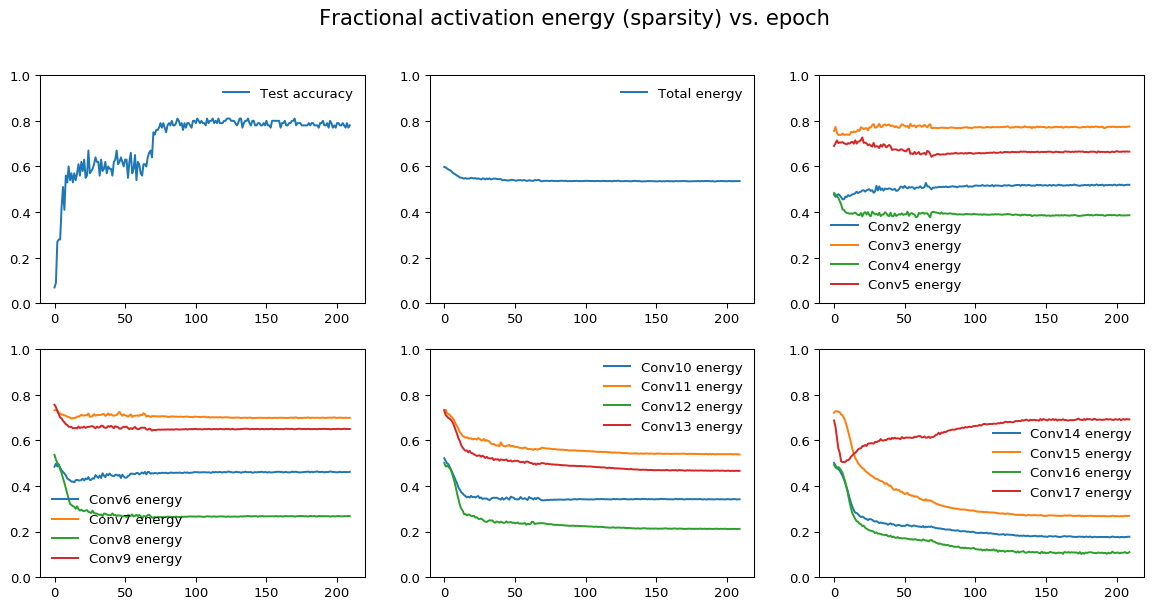

In [4]:
total_energy = fractional_layer_energies[:,0]
conv1_energy = fractional_layer_energies[:,1]
conv2_energy = fractional_layer_energies[:,2]
conv3_energy = fractional_layer_energies[:,3]
conv4_energy = fractional_layer_energies[:,4]
conv5_energy = fractional_layer_energies[:,5]
conv6_energy = fractional_layer_energies[:,6]
conv7_energy = fractional_layer_energies[:,7]
conv8_energy = fractional_layer_energies[:,8]
conv9_energy = fractional_layer_energies[:,9]
conv10_energy = fractional_layer_energies[:,10]
conv11_energy = fractional_layer_energies[:,11]
conv12_energy = fractional_layer_energies[:,12]
conv13_energy = fractional_layer_energies[:,13]
conv14_energy = fractional_layer_energies[:,14]
conv15_energy = fractional_layer_energies[:,15]
conv16_energy = fractional_layer_energies[:,16]
conv17_energy = fractional_layer_energies[:,17]



ylim = 1
ylow = 0 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(0, 1)
plt.plot(test_acc, label = 'Test accuracy')
plt.legend(frameon = False)

plt.subplot(232)
plt.ylim(ylow, ylim)
plt.plot(total_energy, label = 'Total energy')
plt.legend(frameon = False)

plt.subplot(233)
plt.ylim(ylow, ylim)
#plt.plot(conv1_energy, label = 'Conv1 energy')
plt.plot(conv2_energy, label = 'Conv2 energy')
plt.plot(conv3_energy, label = 'Conv3 energy')
plt.plot(conv4_energy, label = 'Conv4 energy')
plt.plot(conv5_energy, label = 'Conv5 energy')
plt.legend(frameon = False)

plt.subplot(234)
plt.ylim(ylow, ylim)
plt.plot(conv6_energy, label = 'Conv6 energy')
plt.plot(conv7_energy, label = 'Conv7 energy')
plt.plot(conv8_energy, label = 'Conv8 energy')
plt.plot(conv9_energy, label = 'Conv9 energy')
plt.legend(frameon = False)

plt.subplot(235)
plt.ylim(ylow, ylim)
plt.plot(conv10_energy, label = 'Conv10 energy')
plt.plot(conv11_energy, label = 'Conv11 energy')
plt.plot(conv12_energy, label = 'Conv12 energy')
plt.plot(conv13_energy, label = 'Conv13 energy')
plt.legend(frameon = False)

plt.subplot(236)
plt.ylim(ylow, ylim)
plt.plot(conv14_energy, label = 'Conv14 energy')
plt.plot(conv15_energy, label = 'Conv15 energy')
plt.plot(conv16_energy, label = 'Conv16 energy')
plt.plot(conv17_energy, label = 'Conv17 energy')
plt.legend(frameon = False)


fig.suptitle('Fractional activation energy (sparsity) vs. epoch', fontsize = 16)

In [0]:
fractional_layer_energies = torch.load('./sample_data/fraction_energy_net0.pth')

In [4]:
num_epochs =26

size_1 = int(fractional_layer_energies[num_epochs-1, 1] * 64)
size_2 = int(fractional_layer_energies[num_epochs-1, 2] * 64)
size_3 = int(fractional_layer_energies[num_epochs-1, 3] * 64)
size_4 = int(fractional_layer_energies[num_epochs-1, 4] * 64)
size_5 = int(fractional_layer_energies[num_epochs-1, 5] * 64)
size_6 = int(fractional_layer_energies[num_epochs-1, 6] * 128)
size_7 = int(fractional_layer_energies[num_epochs-1, 7] * 128)
size_8 = int(fractional_layer_energies[num_epochs-1, 8] * 128)
size_9 = int(fractional_layer_energies[num_epochs-1, 9] * 128)
size_10 = int(fractional_layer_energies[num_epochs-1, 10] * 256)
size_11 = int(fractional_layer_energies[num_epochs-1, 11] * 256)
size_12 = int(fractional_layer_energies[num_epochs-1, 12] * 256)
size_13 = int(fractional_layer_energies[num_epochs-1, 13] * 256)
size_14 = int(fractional_layer_energies[num_epochs-1, 14] * 512)
size_15 = int(fractional_layer_energies[num_epochs-1, 15] * 512)
size_16 = int(fractional_layer_energies[num_epochs-1, 16] * 512)
size_17 = int(fractional_layer_energies[num_epochs-1, 17] * 512)
print(size_1, size_2, size_3, size_4, size_5, size_6, size_7, size_8, size_9, size_10, size_11, size_12, size_13, size_14, size_15, size_16, size_17)

39 31 49 24 44 54 90 36 84 88 155 65 136 130 231 105 300


In [0]:
class Net1(nn.Module):
    expansion = 1

    def __init__(self):
        super(Net1, self).__init__()

        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm1 = nn.BatchNorm2d(size_1)

        # BLOCK 1 #
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.conv3 = nn.Conv2d(size_2, size_3, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm3 = nn.BatchNorm2d(size_3)
        self.shortcut1 = nn.Conv2d(size_1, size_3, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS1 = nn.BatchNorm2d(size_3)

        self.conv4 = nn.Conv2d(size_3, size_4, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.shortcut2 = nn.Conv2d(size_3, size_5, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS2 = nn.BatchNorm2d(size_5)


        # BLOCK 2 #
        self.conv6 = nn.Conv2d(size_5, size_6, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm6 = nn.BatchNorm2d(size_6)
        self.conv7 = nn.Conv2d(size_6, size_7, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.shortcut3 = nn.Conv2d(size_5, size_7, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS3 = nn.BatchNorm2d(size_7)
        
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.shortcut4 = nn.Conv2d(size_7, size_9, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS4 = nn.BatchNorm2d(size_9)


        # BLOCK 3 #
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.conv11 = nn.Conv2d(size_10, size_11, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm11 = nn.BatchNorm2d(size_11)
        self.shortcut5 = nn.Conv2d(size_9, size_11, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS5 = nn.BatchNorm2d(size_11)
        
        self.conv12 = nn.Conv2d(size_11, size_12, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.shortcut6 = nn.Conv2d(size_11, size_13, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS6 = nn.BatchNorm2d(size_13)


        # BLOCK 4 #
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, stride = 2, padding = 1, bias = False)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.shortcut7 = nn.Conv2d(size_13, size_15, kernel_size = 1, stride = 2, padding = 0, bias = False)
        self.normS7 = nn.BatchNorm2d(size_15)
        
        self.conv16 = nn.Conv2d(size_15, size_16, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm16 = nn.BatchNorm2d(size_16)
        self.conv17 = nn.Conv2d(size_16, size_17, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.shortcut8 = nn.Conv2d(size_15, size_17, kernel_size = 1, stride = 1, padding = 0, bias = False)
        self.normS8 = nn.BatchNorm2d(size_17)

        self.linear = nn.Linear(size_17, 100)


    def forward(self, x0):
        x1 = F.relu(self.norm1(self.conv1(x0)))        # x1 has size 64 (i.e. it has 64 filters)

        # BLOCK 1 #
        x2 = F.relu(self.norm2(self.conv2(x1)))         # x2 has size 64
        x3 = F.relu(self.norm3(self.conv3(x2)))         # x3 has size 64
        xS1 = F.relu(self.normS1(self.shortcut1(x1)))   # have to project x1 to have the same size as x3
        x3 = x3 + xS1                                   
        x4 = F.relu(self.norm4(self.conv4(x3)))         # x4 has size 64
        x5 = F.relu(self.norm5(self.conv5(x4)))         # x5 has size 64
        xS2 = F.relu(self.normS2(self.shortcut2(x3)))   # have to project x3 to have the same size as x5
        x5 = x5 + xS2
        

        # BLOCK 2 #
        x6 = F.relu(self.norm6(self.conv6(x5)))         # x6 has size 128
        x7 = F.relu(self.norm7(self.conv7(x6)))         # x7 has size 128
        xS3 = F.relu(self.normS3(self.shortcut3(x5)))   # have to project x5 to have the same size as x7
        x7 = x7 + xS3
        x8 = F.relu(self.norm8(self.conv8(x7)))         # x8 has size 128
        x9 = F.relu(self.norm9(self.conv9(x8)))         # x9 has size 128
        xS4 = F.relu(self.normS4(self.shortcut4(x7)))   # have to project x7 to have the same size as x9
        x9 = x9 + xS4

        # BLOCK 3 #
        x10 = F.relu(self.norm10(self.conv10(x9)))      # x10 has size 256
        x11 = F.relu(self.norm11(self.conv11(x10)))     # x11 has size 256
        xS5 = F.relu(self.normS5(self.shortcut5(x9)))   # have to project x9 to have the same size as x11
        x11 = x11 + xS5
        x12 = F.relu(self.norm12(self.conv12(x11)))     # x12 has size 256
        x13 = F.relu(self.norm13(self.conv13(x12)))     # x13 has size 256
        xS6 = F.relu(self.normS6(self.shortcut6(x11)))  # have to project x11 to have the same size as x13
        x13 = x13 + xS6

        # BLOCK 4 #
        x14 = F.relu(self.norm14(self.conv14(x13)))     # x14 has size 512
        x15 = F.relu(self.norm15(self.conv15(x14)))     # x15 has size 512
        xS7 = F.relu(self.normS7(self.shortcut7(x13)))  # have to project x13 to have the same size as x15
        x15 = x15 + xS7
        x16 = F.relu(self.norm16(self.conv16(x15)))     # x16 has size 512
        x17 = F.relu(self.norm17(self.conv17(x16)))     # x17 has size 512
        xS8 = F.relu(self.normS8(self.shortcut8(x15)))  # have to project x15 to have the same size as x17
        x17 = x17 + xS8

        x18 = F.avg_pool2d(x17, 4)
        x18 = x18.view(x18.size(0), -1)
        x19 = self.linear(x18)

        output = x19
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17]

        return output, activations


In [7]:
'''train network 1'''

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./../datasets/cifar100', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

device = 'cuda'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch
num_epochs = 210
num_layers = 17

absolute_layer_energies1 = np.zeros((num_epochs, num_layers+1))
fractional_layer_energies1 = np.zeros((num_epochs, num_layers+1))


print('==> Building model..')
net1 = Net1()
net1 = net1.to(device)
net1 = torch.nn.DataParallel(net1)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.08, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net1.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    # global absolute_layer_energies
    # global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        acc = correct/total    
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies1[epoch] = this_epoch_frac_energies
    absolute_layer_energies1[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies1[epoch, 0]))


def test(epoch):
    global best_acc
    net1.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net1(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            if batch_idx%100 == 0:
                best_acc = max(acc, best_acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
            if acc>=best_acc:
                #print('Saving')
                torch.save(net1.state_dict(),'./sample_data/resnet18_net1.pth')


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((num_layers+1,), dtype = int)
    num_non_zeros = np.zeros((num_layers+1,), dtype = int)
    total_activations = np.zeros((num_layers+1,), dtype = int)
    fraction_non_zero = np.zeros((num_layers+1,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))

        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net1.parameters(), lr=0.005, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net1.parameters(), lr=0.0005, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))


torch.save(fractional_layer_energies1,'./sample_data/fraction_energy_net1.pth')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
==> Building model..

Epoch: 0
0 100 Lap time (s): 0.13 | Loss: 4.702 | Acc: 0.781% (2/256)
100 100 Lap time (s): 6.18 | Loss: 4.236 | Acc: 5.550% (1435/25856)
Total activation density: 0.617
0 100 Lap time (s): 0.08 | Loss: 3.948 | Acc: 7.000% (7/100) | Best acc: 0.070
Elapsed time: 40.69

Epoch: 1
0 100 Lap time (s): 0.12 | Loss: 3.696 | Acc: 13.672% (35/256)
100 100 Lap time (s): 5.96 | Loss: 3.582 | Acc: 14.032% (3628/25856)
Total activation density: 0.622
0 100 Lap time (s): 0.09 | Loss: 3.741 | Acc: 14.000% (14/100) | Best acc: 0.140
Elapsed time: 57.03

Epoch: 2
0 100 Lap time (s): 0.12 | Loss: 3.276 | Acc: 21.484% (55/256)
100 100 Lap time (s): 6.00 | Loss: 3.176 | Acc: 20.958% (5419/25856)
Total activation density: 0.626
0 100 Lap time (s): 0.08 | Loss: 3.341 | Acc: 24.000% (24/100) | Best acc: 0.240
Elapsed time: 71.30

Epoch: 3
0 100 Lap time (s): 0.12 | Loss: 2.654 | Acc: 30.469

Text(0.5, 0.98, 'Fractional activation energy (sparsity) vs. epoch')

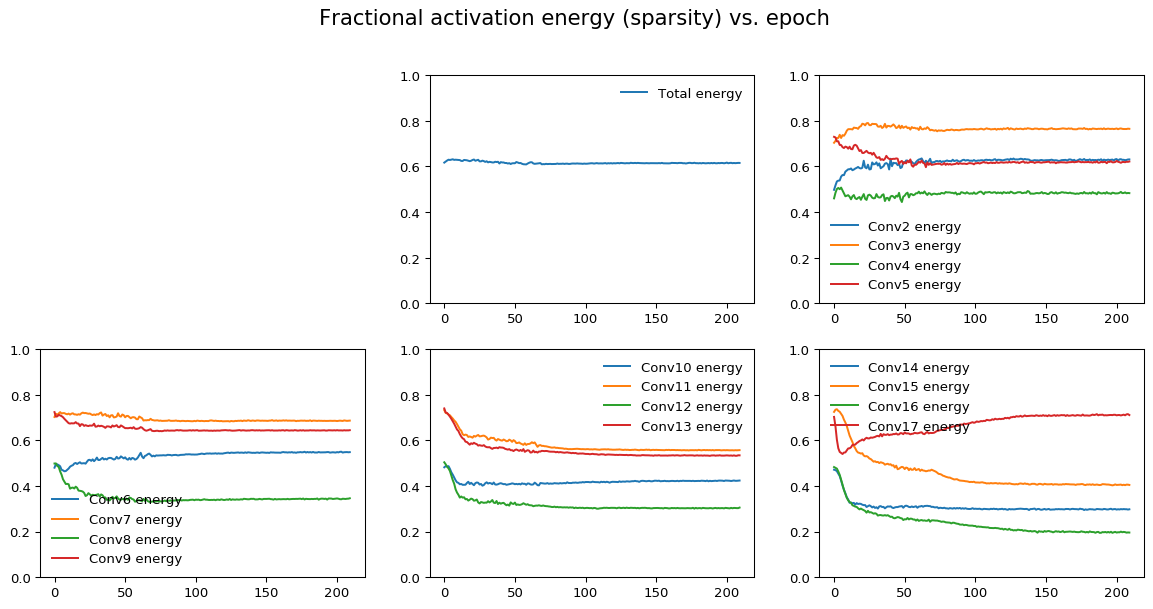

In [8]:
total_energy = fractional_layer_energies1[:,0]
conv1_energy = fractional_layer_energies1[:,1]
conv2_energy = fractional_layer_energies1[:,2]
conv3_energy = fractional_layer_energies1[:,3]
conv4_energy = fractional_layer_energies1[:,4]
conv5_energy = fractional_layer_energies1[:,5]
conv6_energy = fractional_layer_energies1[:,6]
conv7_energy = fractional_layer_energies1[:,7]
conv8_energy = fractional_layer_energies1[:,8]
conv9_energy = fractional_layer_energies1[:,9]
conv10_energy = fractional_layer_energies1[:,10]
conv11_energy = fractional_layer_energies1[:,11]
conv12_energy = fractional_layer_energies1[:,12]
conv13_energy = fractional_layer_energies1[:,13]
conv14_energy = fractional_layer_energies1[:,14]
conv15_energy = fractional_layer_energies1[:,15]
conv16_energy = fractional_layer_energies1[:,16]
conv17_energy = fractional_layer_energies1[:,17]



ylim = 1
ylow = 0 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
#plt.subplot(231)
#plt.ylim(0, 1)
#plt.plot(test_acc, label = 'Test accuracy')
#plt.legend(frameon = False)

plt.subplot(232)
plt.ylim(ylow, ylim)
plt.plot(total_energy, label = 'Total energy')
plt.legend(frameon = False)

plt.subplot(233)
plt.ylim(ylow, ylim)
#plt.plot(conv1_energy, label = 'Conv1 energy')
plt.plot(conv2_energy, label = 'Conv2 energy')
plt.plot(conv3_energy, label = 'Conv3 energy')
plt.plot(conv4_energy, label = 'Conv4 energy')
plt.plot(conv5_energy, label = 'Conv5 energy')
plt.legend(frameon = False)

plt.subplot(234)
plt.ylim(ylow, ylim)
plt.plot(conv6_energy, label = 'Conv6 energy')
plt.plot(conv7_energy, label = 'Conv7 energy')
plt.plot(conv8_energy, label = 'Conv8 energy')
plt.plot(conv9_energy, label = 'Conv9 energy')
plt.legend(frameon = False)

plt.subplot(235)
plt.ylim(ylow, ylim)
plt.plot(conv10_energy, label = 'Conv10 energy')
plt.plot(conv11_energy, label = 'Conv11 energy')
plt.plot(conv12_energy, label = 'Conv12 energy')
plt.plot(conv13_energy, label = 'Conv13 energy')
plt.legend(frameon = False)

plt.subplot(236)
plt.ylim(ylow, ylim)
plt.plot(conv14_energy, label = 'Conv14 energy')
plt.plot(conv15_energy, label = 'Conv15 energy')
plt.plot(conv16_energy, label = 'Conv16 energy')
plt.plot(conv17_energy, label = 'Conv17 energy')
plt.legend(frameon = False)


fig.suptitle('Fractional activation energy (sparsity) vs. epoch', fontsize = 16)